In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")

In [19]:
data = pd.read_csv("train.csv")
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
data[["GrLivArea", "BedroomAbvGr", "FullBath", "SalePrice"]].isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

In [25]:
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]
target = "SalePrice"

df = data[features + [target]].dropna()

X = df[features]
y = df[target]

X.head()

,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (1168, 3)
Testing Data: (292, 3)


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


In [32]:
y_pred = model.predict(X_test)

y_pred[:5]

array([113410.67255298, 305081.87775899, 135904.78562983, 205424.67564124,
       227502.68349004])

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Evaluation Metrics
MAE  : 35788.06
MSE  : 2806426667.25
RMSE : 52975.72
R²   : 0.6341


In [38]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

coeff_df

,Feature,Coefficient
0,GrLivArea,104.026307
1,BedroomAbvGr,-26655.165357
2,FullBath,30014.324109


In [39]:
print("Intercept:", model.intercept_)

Intercept: 52261.74862694448


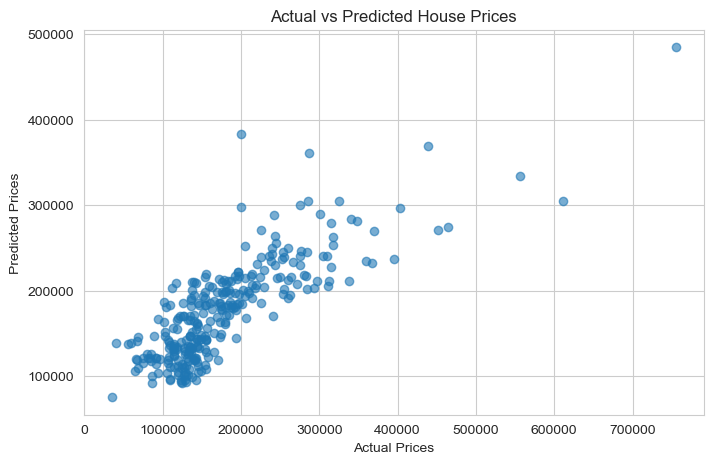

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

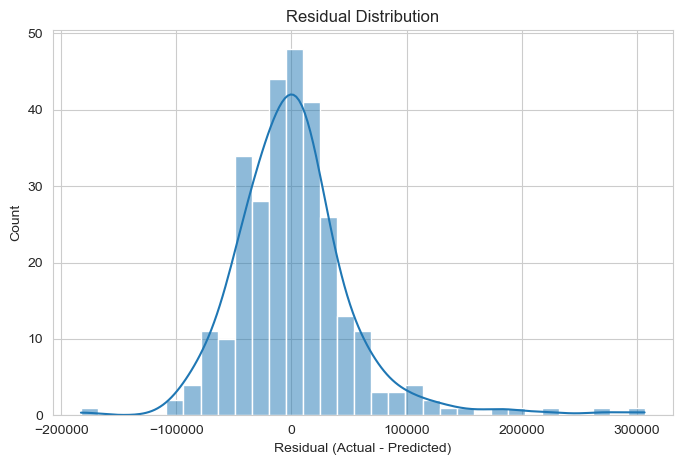

In [48]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

In [50]:
example_house = np.array([[2000, 3, 2]])
predicted_price = model.predict(example_house)[0]

print("Example Prediction")
print("Input: 2000 sqft, 3 bedrooms, 2 bathrooms")
print(f"Predicted House Price: ${predicted_price:.2f}")

Example Prediction
Input: 2000 sqft, 3 bedrooms, 2 bathrooms
Predicted House Price: $240377.51


C:\Users\prath\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
